## Import modules

In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import poisson
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
# Reading the Dataset
df = pd.read_csv('C:/Users/New/Downloads/Final Projects/Big_Market_Sales_Analysis/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
x=df.iloc[:,11]
x

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [6]:
a=x.mean()
a

2181.288913575032

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

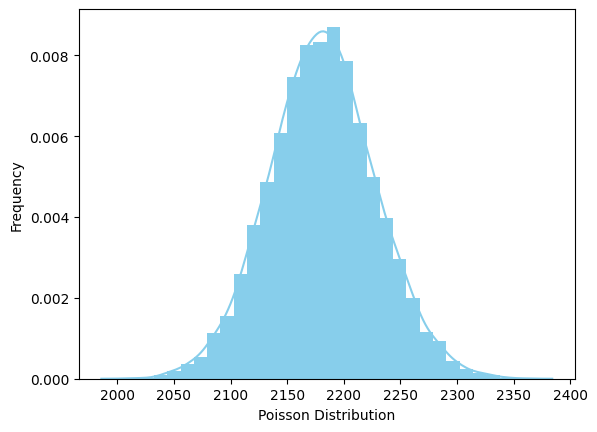

In [7]:
# Analysing using poisson distribution
data_poisson = poisson.rvs(mu=a, size=8523)
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [8]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing the dataset

In [9]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
# Removing unnecessary attributes
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [13]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
# Checking for the missing value
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [15]:
# Replacing the missing value with the mean value
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [16]:
df['Item_Weight'].isnull().sum()

0

In [17]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [19]:
# Checking the missing value for the OUTLET_SIZE attributes
df['Outlet_Size'].isnull().sum()

0

In [20]:
# Checking the missing value for the ITEM_VISIBILITY attributes
sum(df['Item_Visibility']==0)

526

In [21]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [22]:
sum(df['Item_Visibility']==0)

0

In [23]:
# combine item_fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Creation of New Attributes

In [24]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [25]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [26]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [27]:
# create small values for establishment year
df['Outlet_Years'] = 2020 - df['Outlet_Establishment_Year']

In [28]:
df['Outlet_Years']

0       21
1       11
2       21
3       22
4       33
        ..
8518    33
8519    18
8520    16
8521    11
8522    23
Name: Outlet_Years, Length: 8523, dtype: int64

In [29]:
# Printing the first five rows of new dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,22
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,33


## Exploratory Data Analysis

<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

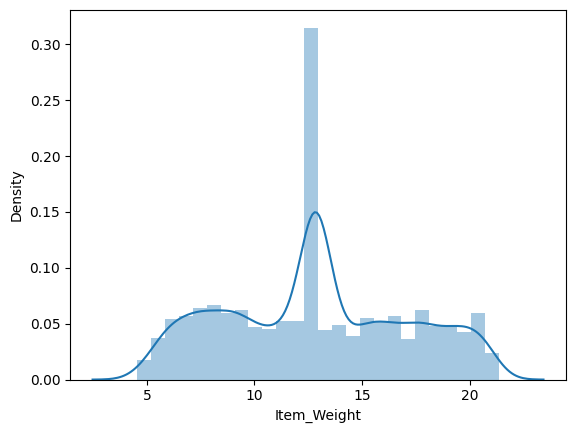

In [30]:
# Visualizing using DISTPLOT
sns.distplot(df['Item_Weight'])

<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

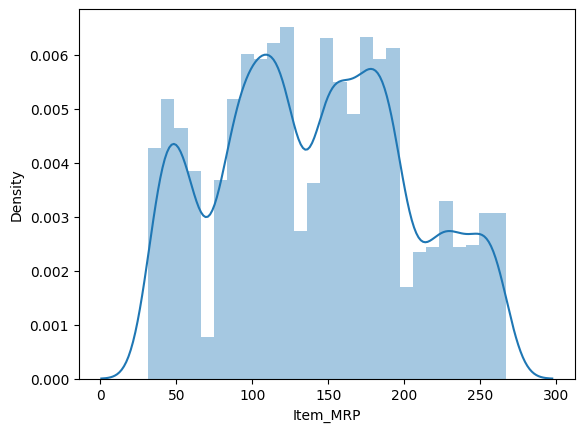

In [31]:
sns.distplot(df['Item_MRP'])

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

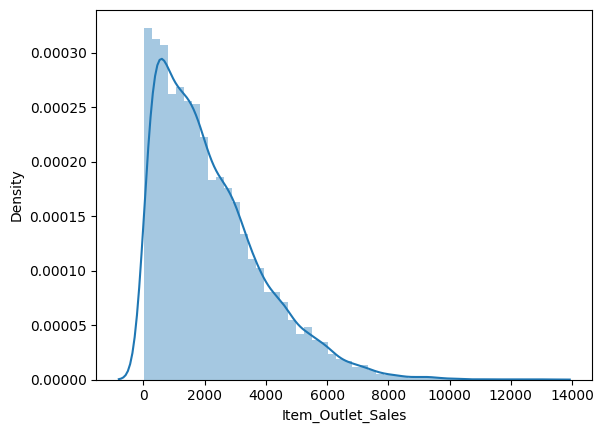

In [32]:
sns.distplot(df['Item_Outlet_Sales'])

## Coorelation Matrix



<AxesSubplot: >

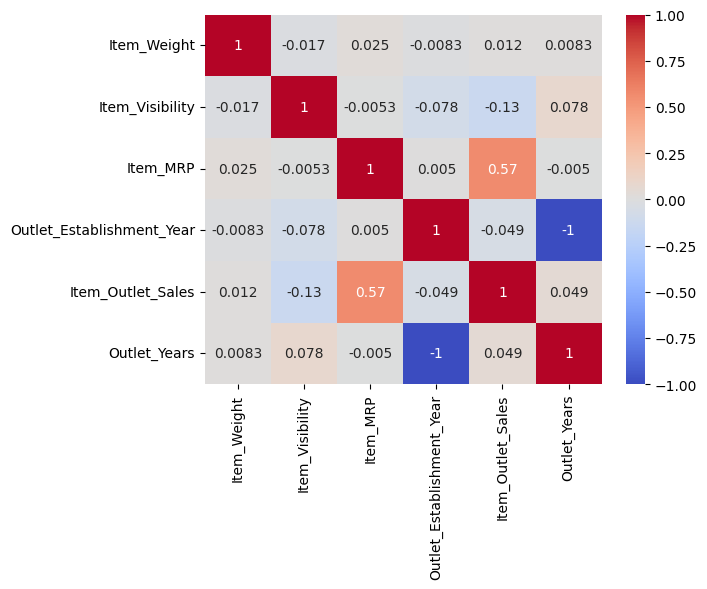

In [33]:
# Correlation matrix with heat map
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Label Encoding

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,22
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,33


In [35]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

## Onehot Encoding

In [36]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,21,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,11,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,21,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,732.3800,22,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,994.7052,33,1,...,0,0,1,0,1,0,0,0,0,1


## Input Split

In [37]:
# Splitting the data into dependent and independent variable
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

## Model Training

In [38]:
# Training the dataset
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print(pred)
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

[4056.  552. 2352. ... 1552. 1420. 1180.]
Model Report
MSE: 1271751.2688232784
CV Score: 1276582.802941402


<AxesSubplot: title={'center': 'Model Coefficients'}>

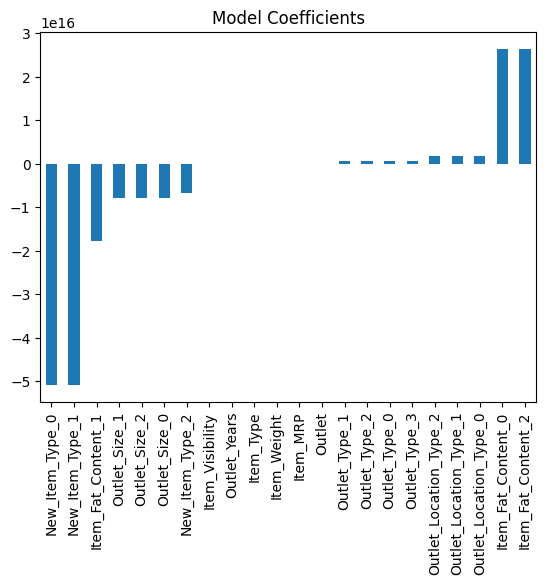

In [39]:
# Fiiting the data into model(linear regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [40]:
Year=[2019,2020]
Total_Sale=[16272275,18591125]
sale1= pd.DataFrame(Year, index =[1,2],columns =['Year'])
sale2=pd.DataFrame(Total_Sale, index =[1,2],columns =['Total_Sale'])
regressor = LinearRegression()
regressor.fit(sale1,sale2)
#regression intercept
print(regressor.intercept_)

[-4.66548587e+09]


In [41]:
print(regressor.coef_)

[[2318850.]]


In [42]:
y=((regressor.coef_*2021)+regressor.intercept_)
y

array([[20909975.]])

In [43]:
y=((regressor.coef_*2021)+regressor.intercept_,(regressor.coef_*2022)+regressor.intercept_,(regressor.coef_*2023)+regressor.intercept_,(regressor.coef_*2024)+regressor.intercept_,(regressor.coef_*2025)+regressor.intercept_,(regressor.coef_*2026)+regressor.intercept_,(regressor.coef_*2027)+regressor.intercept_,(regressor.coef_*2028)+regressor.intercept_,(regressor.coef_*2029)+regressor.intercept_)
y

(array([[20909975.]]),
 array([[23228825.]]),
 array([[25547675.]]),
 array([[27866525.]]),
 array([[30185375.]]),
 array([[32504225.]]),
 array([[34823075.]]),
 array([[37141925.]]),
 array([[39460775.]]))

In [44]:
# Predicting the future values
Predicted_Years=[2021,2022,2023,2024,2025,2026,2027,2028,2029]
Predicted_Sales=[20909975,23228825,25547675,27866525,30185375,32504225,34823075,37141925,39460775]
data_dict={'Predicted_Sales':pd.Series(Predicted_Sales)}
data_dict1={'Predicted_Years':pd.Series(Predicted_Years),'Predicted_Sales':pd.Series(Predicted_Sales)}
dframe=pd.DataFrame(data_dict)
dframe1=pd.DataFrame(data_dict1)
dframe1

,Predicted_Years,Predicted_Sales
0,2021,20909975
1,2022,23228825
2,2023,25547675
3,2024,27866525
4,2025,30185375
5,2026,32504225
6,2027,34823075
7,2028,37141925
8,2029,39460775


Text(0.5, 0, 'Predicted_Months')

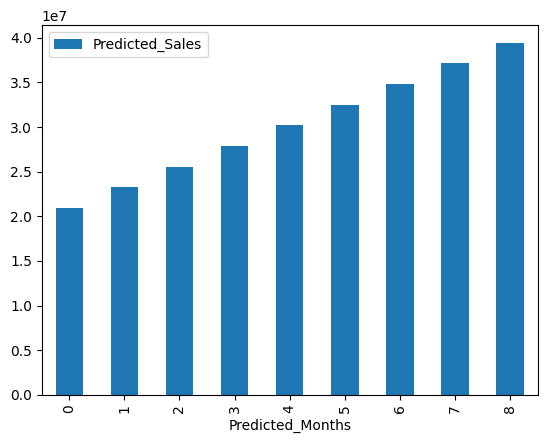

In [45]:
# Visualizing the predicted values
dframe.plot.bar()
plt.xlabel("Predicted_Months")

In [46]:
df = pd.read_csv('C:/Users/New/Downloads/Final Projects/Big_Market_Sales_Analysis/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
df['Frozen Foods'] = np.where(df['Item_Type']=='Frozen Foods' , 1, 0)

In [48]:
# Encoding the data into 0's and 1's
df['Outlet'] = np.where(df['Outlet_Type']=='Supermarket Type1' , 1, 0)
df['count'] = 1
df = df[['Frozen Foods','Outlet','count']]
df.head(5)

,Frozen Foods,Outlet,count
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,0,1,1


In [49]:
# finding the conditional probability
pd.pivot_table(
    df, 
    values='count', 
    index=['Frozen Foods'], 
    columns=['Outlet'], 
    aggfunc=np.size, 
    fill_value=0
)

Outlet,0,1
Frozen Foods,,
0,2662,5005
1,284,572


In [50]:
PA = (284+572) / (284+572+2662+5005) 
PA

0.1004341194415112

In [51]:
PB = (2662+5005) / (284+572+2662+5005)
PB

0.8995658805584887

In [52]:
PAB=(572/(284+572+2662+5005))
PAB

0.06711251906605656

In [53]:
# p(a|b)=p(a)+p(b)+p(ab)
PF=(0.06711251906605656)/(0.8995658805584887)
print("The probability that the sale of frozen food is greater than 500 if the outlettype is supermarket1:",PF)

The probability that the sale of frozen food is greater than 500 if the outlettype is supermarket1: 0.07460545193687232
